# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://wallpapers.com/images/high/cool-rapper-zs7xat10uqylszmy.webp "Great image choice, Jonas")

Today, we will use network science and Wikipedia to learn about the relationships of **[West Coast](https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians)** and **[East coast](https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians)** rappers. 

To create the network, we will download the Wikipedia pages for all rappers from each coast. Next, we will create the network of the pages that link to each other. Since wikipedia pages link to each other. So [Snoop Dogg](https://en.wikipedia.org/wiki/Snoop_Dogg) links to [Dr. Dre](https://en.wikipedia.org/wiki/Dr._Dre), for example.

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to understand the text displayed on those pages.

But for today, the tasks are

* Learn about regular expressions
* Learn about Pandas dataframes
* Download and store (for later use) all the rapper-pages from Wikipedia
* Extract all the internal wikipedia-links that connect the rappers on wikipedia
* Generate the network of rappers on wikipedia. 
* Calculate some simple network statistics.

## The Guide to Week 4 (not to be missed)

Today I talk about 

* Results of the user satisfaction questionnaire
* Assignment 1
* Today's exercises

> * ***Video lecture*** Guide to week 4 https://www.dropbox.com/scl/fi/b760tkugfrnm9kca1apnb/GuideToWeek4.mp4?rlkey=r7y6pijkafc9zn5tcz1cmj8dg&dl=0

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us, up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links. And for that we need regular expressions.

> _Exercises_: Regular expressions round 1\.
> 
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples.
> * Now, explain in your own words: what are regular expressions?
#### Answer
A way to search for matching text patterns - If there is one it returns an object and no if not

> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 

Finally, we need to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/Eudemus_of_Rhodes). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

In [1]:
import re
import requests

# Fetch content from the link
response = requests.get('https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt')
text = response.text

# The regular expression to match 4-digit numbers
pattern = r'\b\d{4}\b'

# Use findall to extract all 4-digit numbers from the text
matched_numbers = re.findall(pattern, text)

print(matched_numbers)


['1234', '9999']


In [2]:
import re

# The regular expression to match words starting with "super"
pattern2 = r'\bsuper\w*\b'

# Use findall to extract all matching words from the text
matched_words = re.findall(pattern2, text, re.IGNORECASE)  # re.IGNORECASE ensures it captures words like "Superman" as well

print(matched_words)


['superpolaroid', 'supertaxidermy', 'superbeer']


In [3]:
#Extract wiki-links
import re

# The regular expression to match wiki-links
pattern3 = r'\[\[([^\|\]]+)(?:\|[^\]]+)?\]\]'
matched_links = re.findall(pattern3, text)

print(matched_links)


['drinking vinegar', 'gentrify', 'hashtag', 'Bicycle', 'Pitchfork']


# Prelude part 2: Pandas DataFrames


Before starting, we will also learn a bit about [pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), a very user-friendly data structure that you can use to manipulate tabular data. Pandas dataframes are implemented within the [pandas package] (https://pandas.pydata.org/).

Pandas dataframes should be intuitive to use. **We suggest you to go through the [10 minutes to Pandas tutorial](https://pandas.pydata.org/pandas-docs/version/0.22/10min.html#min) to learn what you need to solve the next exercise.**

---

# Part A: Download the Wikipedia pages of rappers

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you revisit the [**APIs note book**](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/API_check.ipynb) from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). .

Now, you could first download the names of all the rappers, starting from 

* https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians
* https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians

But this might result in so much pain and suffering that I will not make you do that (although you are very much welcome to try!). Instead, you can download all the names, nice and clean, here (it might still include couple of *noisy* links, but should be fine in 95% of records):
 
* **[West coast List](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestCoastRappers.csv)**
* **[East coast List](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/EastCoastRappers.csv)**

The files contain the wiki-link of all rappers in the two lists above. 


In [4]:
import urllib.request

url = 'https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians'
response = urllib.request.urlopen(url)
data = response.read()      # a `bytes` object
text = data.decode('utf-8')


text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-disabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-not-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Category:West Coast hip hop musicians - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-dis

---

# Part B: Building the networks

Now, we're going to build one huge NetworkX directed graph, which includes both West-coast and East-coast rappers. 

The nodes in the network will be all the rappers, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

 

> ***Video instructions:*** Getting started with rap music. Link: https://www.dropbox.com/scl/fi/ivd99y7tfeqpzj9lxgh0p/GettingStartedWithRapMusic.mp4?rlkey=6y3ye8iex6ogcy93jzyviqlej&dl=0


> 
> _Exercise_: Build the network of rappers 

> Now we can build the network. Isn't this a little bit cool? What a dataset :)

> The overall strategy for this is the following: 
> Take the pages you have downloaded for each rappers. 
> Each page corresponds to a rapper, which is a node in your network. 
> Find all the hyperlinks in a rapper's page that link to another node of the network (e.g. an other character). 
> There are many ways to do this, but below, I've tried to break it down into natural steps. 
> Keep in mind that the network should include **both** West-coast and East-coast rappers (and that it is possible that some West-coast rappers will have links to East-coast rappers and vice-versa).
> 
> **Note**: When you add a node to the network, also include an `attribute` (i.e. that specifies the universe where the character comes from; either West coast, or East coast)
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
> * For each link you extract, check if the target is a rapper. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.github.io/documentation/development/reference/classes.digraph.html) to store the network. Store also the properties of the nodes (i.e. which coast they represent).
> * When have you finished, you'll notice that some nodes do not have any out- or in- degrees. You may *discard* those from the network.


In [5]:
import pandas as pd 
import re

EastCoast=pd.read_csv('/Users/danielhoang/Documents/GitHub/socialgraphs2019/files/EastCoastRappers.csv')
WestCoast=pd.read_csv('/Users/danielhoang/Documents/GitHub/socialgraphs2019/files/WestCoastRappers.csv')
TopRapper = EastCoast.WikipediaPageName[0]
TopRapper = EastCoast.WikipediaPageName[0]
TopRapper




'6ix9ine'

In [6]:
import requests
import pandas as pd
import re
from requests.exceptions import JSONDecodeError

# Remove parentheses content from a string
def remove_parentheses_content(s):
    return re.sub(r'\(.*?\)', '', s).strip()

# Get links and content from wikipedia
def get_links_and_content_from_wikipedia(rapper_name):
    baseurl = "https://en.wikipedia.org/w/api.php?"
    params = {
        "action": "query",
        "prop": "revisions",
        "rvprop": "content",
        "format": "json",
        "titles": rapper_name
    }
    wikitext_request = requests.get(baseurl, params=params)

    try:
        wikijson = wikitext_request.json()
    except JSONDecodeError:
        print(f"Error with rapper: {rapper_name}")
        return [], ""  # Return an empty list and empty string for content

    page_id = list(wikijson["query"]["pages"].keys())[0]
    wikitext = wikijson["query"]["pages"][page_id]["revisions"][0]["*"]

    pattern = r'\[\[(?:Category:)?([^\|\]]+)(?:\|[^\]]+)?\]\]'
    matched_links = re.findall(pattern, wikitext)
    
    return matched_links, wikitext

# Read in the data
EastCoast = pd.read_csv('/Users/danielhoang/Documents/GitHub/socialgraphs2019/files/EastCoastRappers.csv')
WestCoast = pd.read_csv('/Users/danielhoang/Documents/GitHub/socialgraphs2019/files/WestCoastRappers.csv')

# Get links and content for each rapper
eastcoast_data = {rapper: get_links_and_content_from_wikipedia(rapper) for rapper in EastCoast.WikipediaPageName}
westcoast_data = {rapper: get_links_and_content_from_wikipedia(rapper) for rapper in WestCoast.WikipediaPageName}

# Separate links and content
eastcoast_links = {rapper: data[0] for rapper, data in eastcoast_data.items()}
westcoast_links = {rapper: data[0] for rapper, data in westcoast_data.items()}
eastcoast_contents = {rapper: data[1] for rapper, data in eastcoast_data.items()}
westcoast_contents = {rapper: data[1] for rapper, data in westcoast_data.items()}

# Remove parentheses content from links
eastcoast_links = {rapper: [remove_parentheses_content(link) for link in links] for rapper, links in eastcoast_links.items()}
westcoast_links = {rapper: [remove_parentheses_content(link) for link in links] for rapper, links in westcoast_links.items()}

# Print the links (contents will be used later during graph creation)
print(eastcoast_links)
print(westcoast_links)


{'6ix9ine': ['New York City', 'Hip hop music', 'scream rap', 'hardcore hip hop', 'SoundCloud rap', 'punk rap', 'Apple Music', 'Create Music Group', '10K Projects', 'Virgin Music Label & Artist Services', 'Shotti', 'feud', 'Poles 1469', 'Gummo', 'sleeper hit', 'mixtape', 'Day69', 'Kooda', 'Keke', 'Fetty Wap', 'A Boogie wit da Hoodie', 'Gotti', 'Billboard Hot 100', 'Fefe', 'Nicki Minaj', 'Murda Beatz', 'Dummy Boy', 'Billboard 200', 'RIAA certification', 'Recording Industry Association of America', 'pleaded guilty', 'felony', 'Child pornography', 'probation', 'Trial of the Nine Trey Gangsters', 'Racket', 'Conspiracy', 'Murder', 'armed robbery', 'COVID-19 pandemic', 'COVID-19', 'asthma', 'Gooba', 'Trollz', 'TattleTales', 'Billboard 200', 'Leyenda Viva', 'reggaeton', 'informant', 'Trial of the Nine Trey Gangsters', 'Bushwick, Brooklyn', 'Brooklyn', 'Atlixco', 'Puebla', 'Río Piedras, Puerto Rico', 'San Juan, Puerto Rico', 'Tidal', 'Psalm 121', 'Child School and Legacy High School', 'Emotiona

In [7]:
#For each link check if it matches from the csv file. That must mean it indeed is a rapper, if not remove it from the list
all_rappers=list(EastCoast.WikipediaPageName)+list(WestCoast.WikipediaPageName)

def filter_links_based_on_csv(rapper_links):
    return [link for link in rapper_links if link in all_rappers]

filtered_eastcoast_links = {rapper: filter_links_based_on_csv(links) for rapper, links in eastcoast_links.items()}
filtered_westcoast_links = {rapper: filter_links_based_on_csv(links) for rapper, links in westcoast_links.items()}

filtered_eastcoast_links 

{'6ix9ine': ['Fetty Wap',
  'ZillaKami',
  'Fetty Wap',
  'Meek Mill',
  'DMX',
  'Tupac Shakur',
  'The Notorious B.I.G.',
  '50 Cent',
  'ZillaKami',
  'Meek Mill',
  '50 Cent',
  'Lil Tjay',
  '6ix9ine'],
 '9th Prince': ['RZA', 'RZA', 'Islord', 'Hell Razah'],
 '22Gz': ['Pop Smoke', 'Sheff G', 'Pop Smoke', 'Fivio Foreign'],
 '38 Spesh': ['Styles P',
  'Jadakiss',
  'Fred the Godson',
  'N.O.R.E.',
  'Kool G Rap',
  'DJ Premier',
  'Pete Rock',
  'Conway the Machine',
  'Benny the Butcher',
  'Kool G Rap',
  'Harry Fraud'],
 'The 45 King': ['Queen Latifah', 'Jay-Z'],
 '50 Cent': ['Dr. Dre',
  'Nate Dogg',
  'Lloyd Banks',
  'Tony Yayo',
  'Jam Master Jay',
  'Jay-Z',
  'Kurupt',
  'Big Pun',
  'DMX',
  'Nas',
  'Sha Money XL',
  'Jay-Z',
  'Dr. Dre',
  'Sha Money XL',
  'Lloyd Banks',
  'Lloyd Banks',
  'Tony Yayo',
  'Spider Loc',
  '40 Glocc',
  'Mase',
  'Jay-Z',
  'Cardiak',
  'Lloyd Banks',
  'Dr. Dre',
  'Swizz Beatz',
  'Pop Smoke',
  'Big Daddy Kane',
  'KRS-One',
  'Nas',
  '

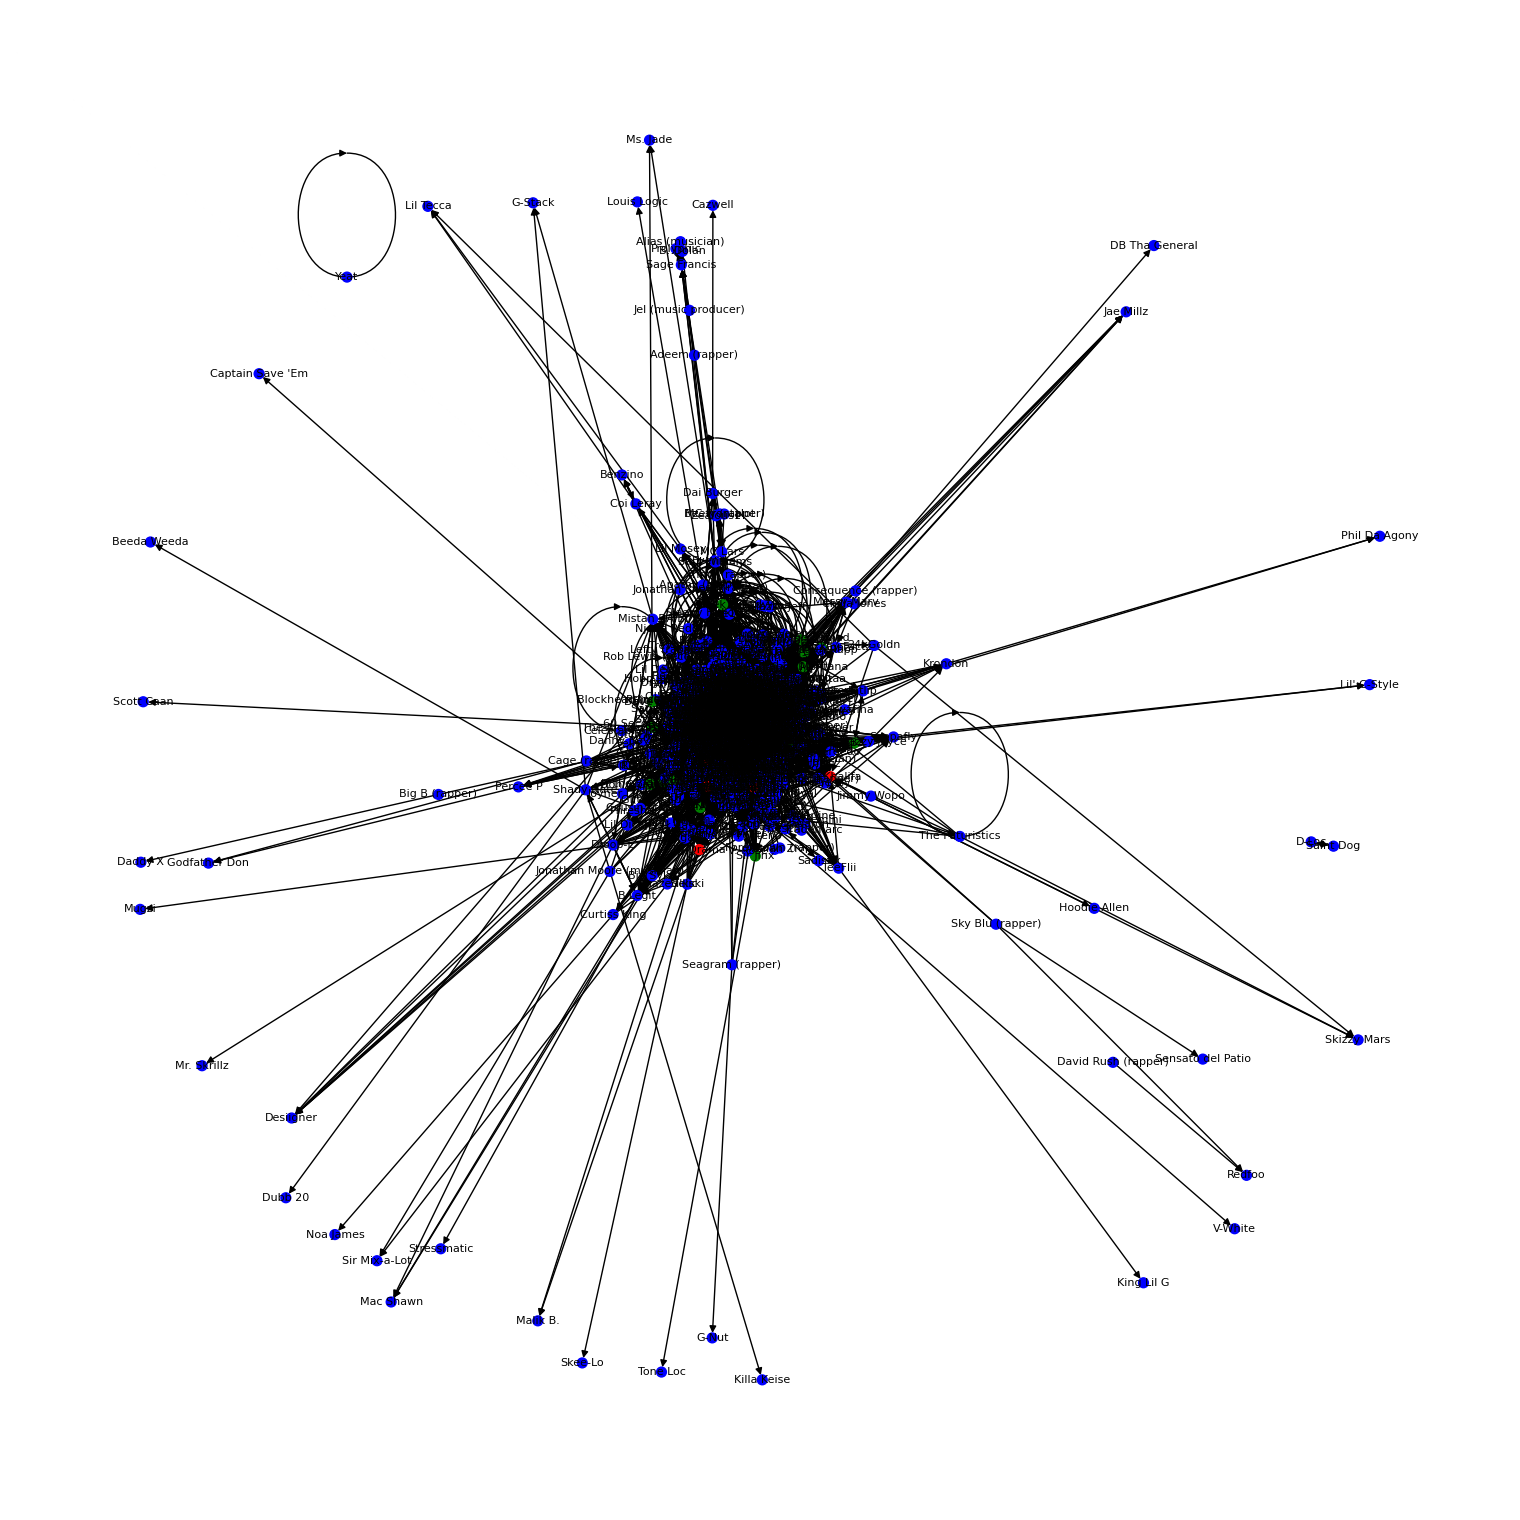

In [8]:
import networkx as nx

# Initialize the directed graph
G = nx.DiGraph()
G.add_nodes_from(all_rappers)

# Add directed edges between rappers and assign 'coast' attribute
for rapper, links in filtered_eastcoast_links.items():
    G.nodes[rapper]['coast'] = 'East'
    G.nodes[rapper]['content'] = eastcoast_contents.get(rapper, "")
    for link in links:
        G.add_edge(rapper, link)
        G.nodes[link]['coast'] = 'East'  # Assigning coast attribute to linked rappers

for rapper, links in filtered_westcoast_links.items():
    G.nodes[rapper]['coast'] = 'West'
    G.nodes[rapper]['content'] = westcoast_contents.get(rapper, "")
    for link in links:
        G.add_edge(rapper, link)
        G.nodes[link]['coast'] = 'West'  # Assigning coast attribute to linked rappers

# Delete nodes with no edges
G.remove_nodes_from(list(nx.isolates(G)))

# Print the top nodes with the highest in-degree and out-degree
top_in_degree = sorted(dict(G.in_degree()).items(), key=lambda x: x[1], reverse=True)[:50]
top_out_degree = sorted(dict(G.out_degree()).items(), key=lambda x: x[1], reverse=True)[:50]

# Color the top nodes based on in-degree and out-degree
for node, degree in top_in_degree:
    G.nodes[node]['color'] = 'red'
for node, degree in top_out_degree:
    G.nodes[node]['color'] = 'green'  # This might overwrite the color for nodes that are in both top lists

# Plotting the graph
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
node_colors = [G.nodes[node].get('color', 'blue') for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=50, node_color=node_colors, arrows=True)
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=8, ha='center', va='center')
plt.show()



> *Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
> * More importantly, what is the number of links?
> * What is the number of links connecting West coast and East coast? What do those links mean?
> * Plot the in and out-degree distributions. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the degree distribution to a *random network* with the same number of nodes and *p*
>     * Compare the degree distribution to a *scale-free* network with the same number of nodes.
> * Who are top 10 most connected rappers? (Report results for in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?
> * Who are the top 5 most connected West coast rappers (again in terms of both in/out-degree)?
> * Who are the top 5 most connected East coast rappers (again in terms of both in/out-degree)?

In [9]:
#Print the number of nodes and edges in the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

#Print the average degree of the graph
print("Average degree:", sum(dict(G.degree()).values())/G.number_of_nodes())

#Print number of links connecting west coast and east coast rappers
print("links connecting west and east rappers:", sum([1 for edge in G.edges() if edge[0] in list(EastCoast.WikipediaPageName) and edge[1] in list(WestCoast.WikipediaPageName)]))

Number of nodes: 723
Number of edges: 5264
Average degree: 14.561549100968188
links connecting west and east rappers: 534


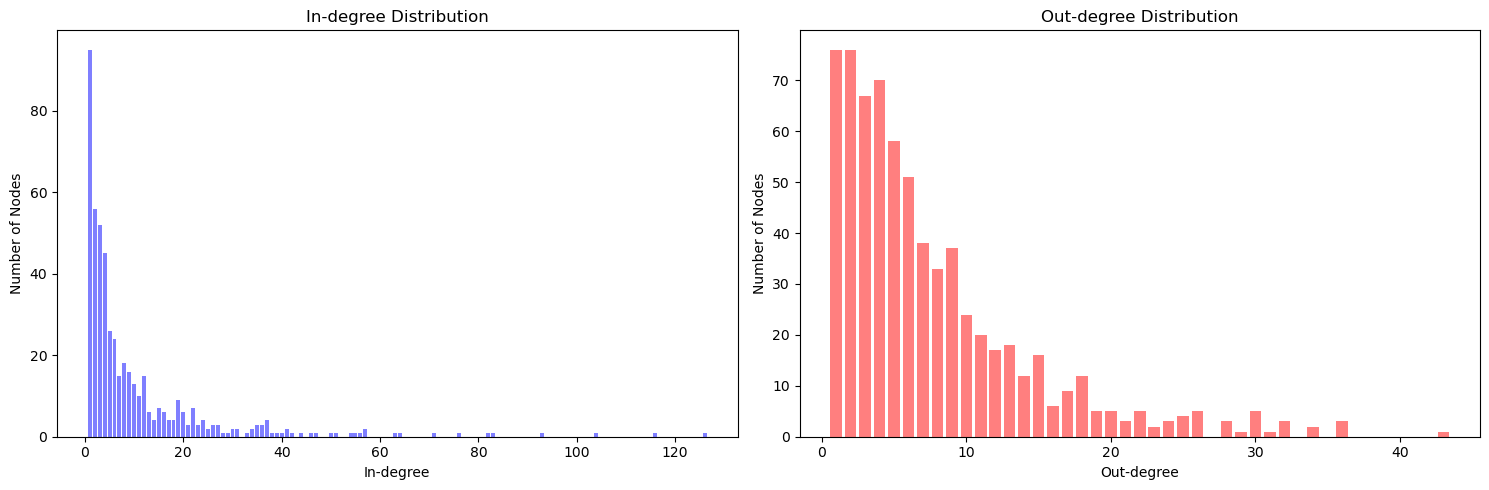

In [10]:
# Indegree values
in_degree_values = [val for key, val in G.in_degree()]
out_degree_values = [val for key, val in G.out_degree()]

# Extract in-and out-degree
top_in_degree = [val for key, val in G.in_degree()]
top_out_degree = [val for key, val in G.out_degree()]

# Initialize a new figure for the histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Plot in-degree histogram on the left subplot (ax1)
ax1.hist(in_degree_values, bins=range(1, max(in_degree_values)+2), align='left', rwidth=0.8, alpha=0.5, color='blue')
ax1.set_title('In-degree Distribution')
ax1.set_xlabel('In-degree')
ax1.set_ylabel('Number of Nodes')

# Plot out-degree histogram on the right subplot (ax2)
ax2.hist(out_degree_values, bins=range(1, max(out_degree_values)+2), align='left', rwidth=0.8, alpha=0.5, color='red')
ax2.set_title('Out-degree Distribution')
ax2.set_xlabel('Out-degree')
ax2.set_ylabel('Number of Nodes')

# Display the plots
plt.tight_layout()

# Display the plot
plt.show()




In [11]:
#Who are top 10 most connected rappers? (Report results for in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?
top_in_degree = sorted(dict(G.in_degree()).items(), key=lambda x: x[1], reverse=True)[:10]
print('top in degree', top_in_degree)

top_out_degree = sorted(dict(G.out_degree()).items(), key=lambda x: x[1], reverse=True)[:10]
print('top out degree', top_out_degree)

#Who are the top 5 most connected West coast rappers (again in terms of both in/out-degree)?
top_5_west = sorted(dict(G.in_degree()).items(), key=lambda x: x[1], reverse=True)[:5]
print('top 5 west', top_5_west)

#Who are the top 5 most connected East coast rappers (again in terms of both in/out-degree)?
top_5_east = sorted(dict(G.in_degree()).items(), key=lambda x: x[1], reverse=True)[:5]
print('top 5 east', top_5_east)




top in degree [('Snoop Dogg', 126), ('Jay-Z', 116), ('Nas', 104), ('50 Cent', 93), ('Busta Rhymes', 83), ('Dr. Dre', 82), ('Kendrick Lamar', 76), ('Tupac Shakur', 71), ('The Notorious B.I.G.', 64), ('E-40', 63)]
top out degree [('Drag-On', 43), ('DJ Dahi', 36), ('Dr. Dre', 36), ('Kendrick Lamar', 36), ('Black Thought', 34), ('The Game (rapper)', 34), ('Jahlil Beats', 32), ('French Montana', 32), ('Kurupt', 32), ('50 Cent', 31)]
top 5 west [('Snoop Dogg', 126), ('Jay-Z', 116), ('Nas', 104), ('50 Cent', 93), ('Busta Rhymes', 83)]
top 5 east [('Snoop Dogg', 126), ('Jay-Z', 116), ('Nas', 104), ('50 Cent', 93), ('Busta Rhymes', 83)]


> The total degree distribution (in + out degree) for you network should resemble the distribution displayed on the image below:
![img](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestcoastvsEastcoast_degrees.png?raw=true)
![img](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestcoastvsEastcoast_degrees_loglog.png?raw=true)


# Overview

This week we'll talk about advanced network measures (beyond the degree distribution). We will use these tools to make sense of the Rapper network. 
This is the outline for today:

* Visualization and qualitative analysis of the Rapper Network
* Properties of the network structure, including how attributes and other properties shape the network

> _Reading_: This week, the reading is mostly for reference. It's for you to have a place to go, if you want more detailed information about the topics that I cover in the video lectures. Thus, I recommend you check out **Chapter 9** of the network science book. In particular, we'll delve into [Section 9.4](http://networksciencebook.com/chapter/9#modularity) in the exercises below. We will also talk a little bit about degree correlations - you can read about those in [Chapter 7](http://networksciencebook.com/chapter/7)\.


![Text](https://wallpapers.com/images/high/cool-rapper-zs7xat10uqylszmy.webp "Great image choice, Jonas")


---
# Part A: Let's  visualise!

We will continue to work with the network from last week, see the lecture for [Week 4](https://nbviewer.jupyter.org/github/socialcomplexitylab/socialgraphs2021/blob/main/lectures/Week4.ipynb) for details. This is important! Actually, in order to continue with the lecture, you *need* to complete Week 4. 


*Exercise 1:* Build the right graph for visualization:

>1. Use NetworkX `DiGraph` to store the network of rappers. Remember that rappers are linked if they have a corresponding link between their Wiki contents.
>   * **Additionally**, extract the largest component - it will make our work with visualizations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: You probably have the right graph if you have around 730 nodes and 6000 edges.
>     - *Note 2*: For directed graphs use `weakly connected component` to extract the largest component.
>     - *Note 3*: Further analysis is done with the largest component
>2. As you build the graph, store the attributes of the nodes (their `coast`). On top of that, let's also store the `length of the content` as one of the attributes of the node (i.e. count the number of *words* you have in each rapper's page). By storing this information as nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.

In [12]:
# Get the nodes and their attributes
node_attributes = list(G.nodes(data=True))

# Print the first few nodes with their attributes for inspection
print(node_attributes[:10])


[('6ix9ine', {'coast': 'West', 'content': '{{short description|American rapper from New York (born 1996)}}\n{{for|similarly-named topics|69 (disambiguation){{!}}69}}\n{{pp-vandalism|small=yes}}\n{{Use mdy dates|date=May 2022}}\n{{Infobox musical artist\n| name              = 6ix9ine\n| image             = 6ix9ine June 2018 side (cropped x2).jpg\n| caption           = 6ix9ine in 2018\n| alt               = 6ix9ine gesturing at the camera\n| birth_name        = Daniel Hernandez\n| alias             = {{flatlist|\n* Tekashi69<ref>{{cite web|url=https://www.tmz.com/2019/04/08/tekashi-4567896ix9ine-plea-deal-jail-release-racketeering-trial/|title=Tekashi69 Has Plan to Get Out of Jail Before September Racketeering Trial|website=TMZ|language=en|access-date=May 24, 2019|archive-date=April 8, 2019|archive-url=https://web.archive.org/web/20190408084233/https://www.tmz.com/2019/04/08/tekashi-6ix9ine-plea-deal-jail-release-racketeering-trial/|url-status=dead}}</ref>\n* Tekashi 6ix9ine<ref>{{cite n

In [13]:
import re
# Extract the largest weakest component
largest_wcc_nodes = max(nx.weakly_connected_components(G), key=len)

# Extract the subgraph corresponding to the largest wcc
largest_wcc = G.subgraph(largest_wcc_nodes)

# Store nodes attributes + length of content using regex
for node, data in G.nodes(data=True):
    # Check if 'content' key exists for node
    if 'content' in data:
        content_length = sum(1 for _ in re.finditer(r'\w+', data['content']))
        G.nodes[node]['content_length'] = content_length
    else: 
        G.nodes[node]['content_length'] = 0

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# print content length
print("Content length:", G.nodes['Kool G Rap']['content_length'])

Number of nodes: 723
Number of edges: 5264
Content length: 4644


*Exercise 2:* Let's build a simple visualization of the network
>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in couple of the following exercises
>2. Use the NetworkX command `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithm here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Node color should depend on the `coast` attribute (i.e. use different colors for west-coast and east-coast rappers).
>   * Set up your plot so that node-size depends on the node *degree*
>   * **Optional**: Set up you plot so that edge color depends on the `role` attribute. If an edge connects west-coast rappers, assign `color_a`, if the edge connects east-coast rappers assign `color_b`, in other cases assign `color_c` (i.e. when rapper from different coasts are connected). (Here, you get to decide on the colors.)

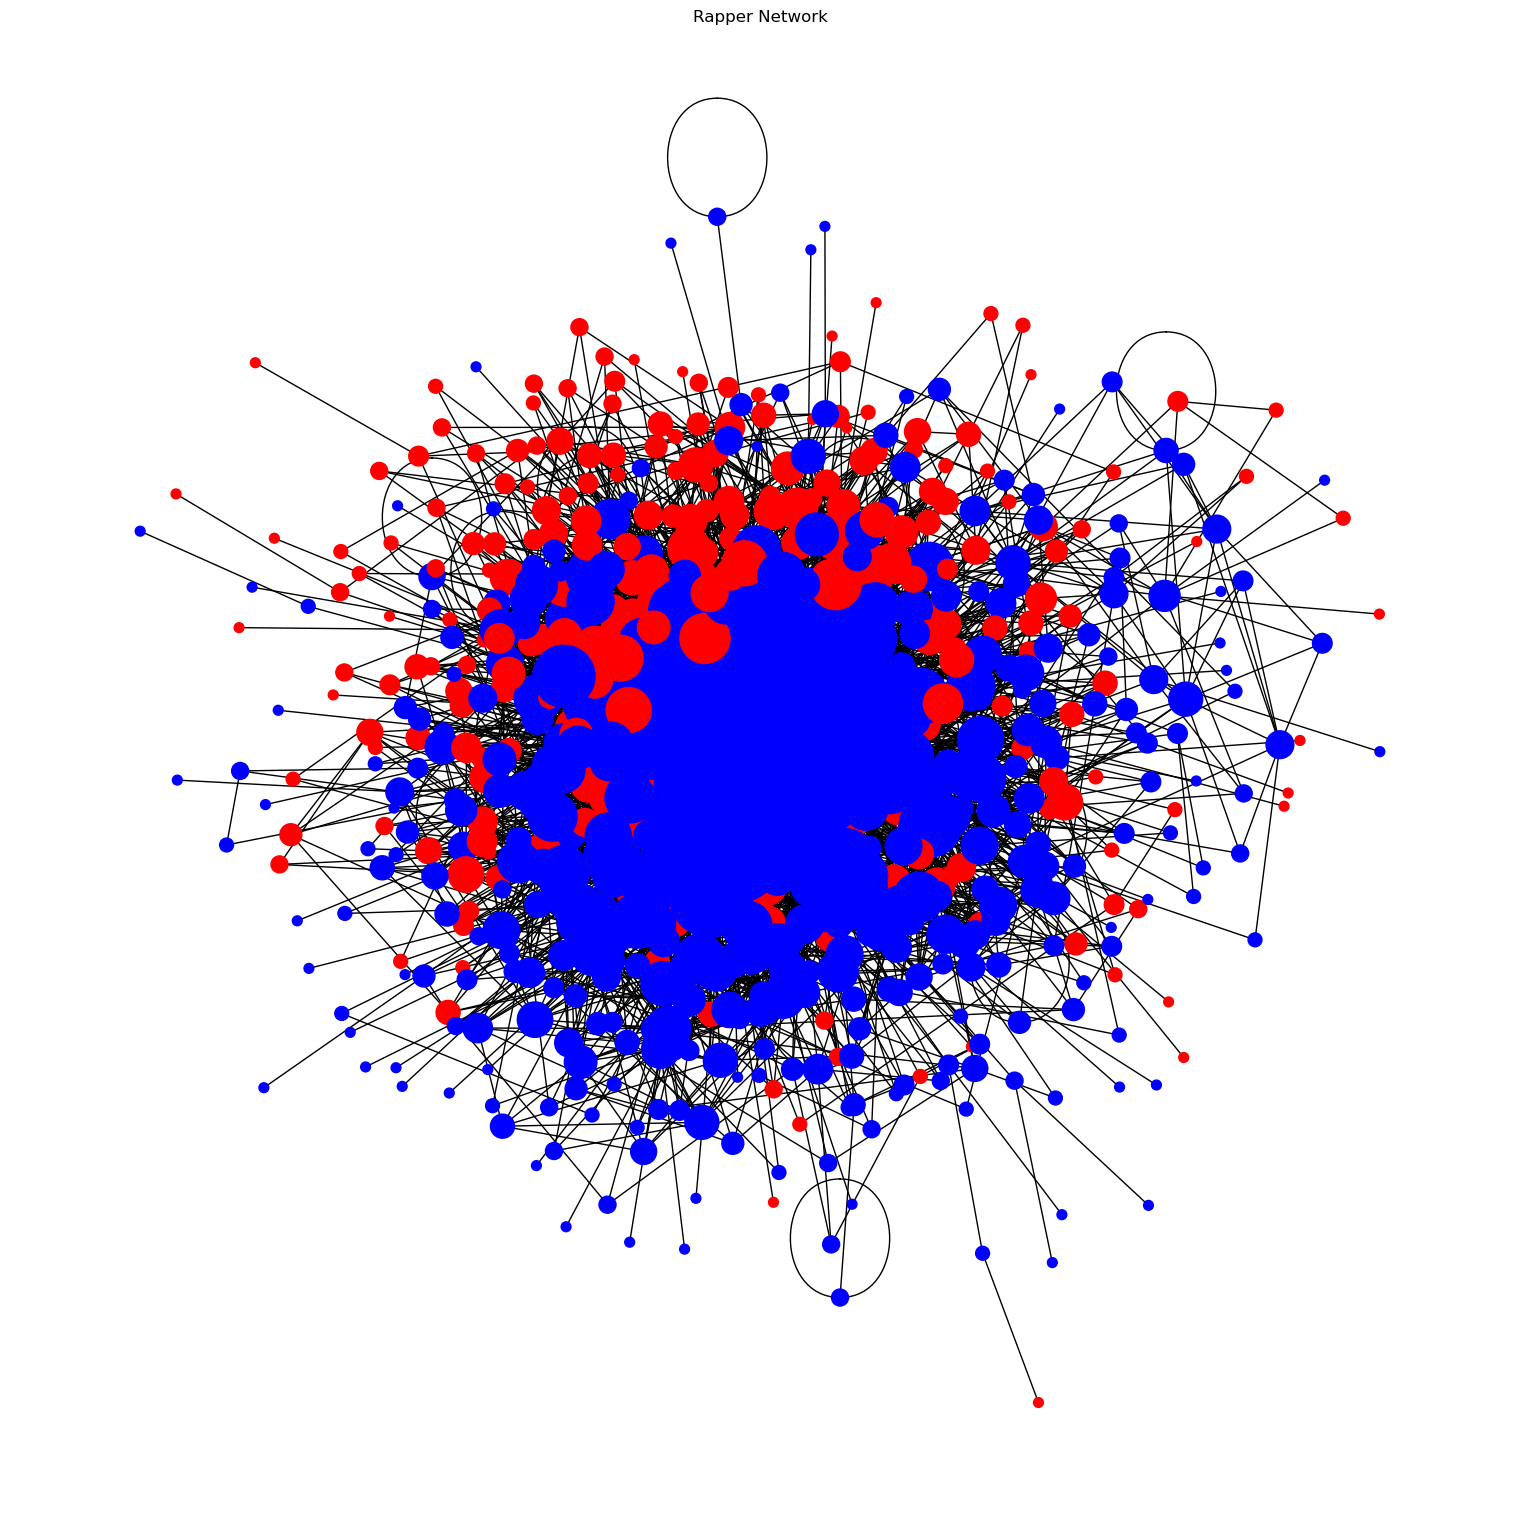

In [20]:
import json
import networkx as nx
import pickle


# Convert network to undirected graph
G_undirected = G.to_undirected()

# Setup node colors based on the 'coast' attribute, handling potential missing attributes
node_colors = []
for node in G_undirected.nodes():
    if 'coast' in G_undirected.nodes[node]:
        if G_undirected.nodes[node]['coast'] == 'East':
            node_colors.append('red')
        else:
            node_colors.append('blue')
    else:
        node_colors.append('gray')  # Default color for nodes without 'coast' attribute

# Edge color based on association to node
color_a='cyan'
color_b='magenta'
color_c='black'

# Determine edge color based on the 'coast' on attribute of node
edge_colors = []
for u, v in G_undirected.edges():
    if G_undirected.nodes[u]['coast'] == 'West' and G_undirected.nodes[v]['coast'] == 'West':
        edge_colors.append(color_a)
    elif G_undirected.nodes[u]['coast'] == 'East' and G_undirected.nodes[v]['coast'] == 'East':
        edge_colors.append(color_b)
    else:
        edge_colors.append(color_c)

# Node size based on degree
node_sizes = [G_undirected.degree(node) * 50 for node in G_undirected.nodes()]

# Use spring layout
pos = nx.spring_layout(G_undirected)

# Draw the graph
plt.figure(figsize=(15,15))
nx.draw_kamada_kawai(G_undirected, with_labels=False, node_size=node_sizes, node_color=node_colors)
plt.title('Rapper Network')
plt.show()




In [22]:
import pickle

with open('/Users/danielhoang/Documents/GitHub/socialgraphs2019/lectures/G_undirected.gpickle', 'wb') as f:
    pickle.dump(G_undirected, f, pickle.HIGHEST_PROTOCOL)


*Exercise 3:* From the previous plot it is more difficult to observe any specific structure in the network. We can make even better visualisations with `ForceAtlas2` package:
>1. [Force Atlas 2 algorithm](https://github.com/bhargavchippada/forceatlas2) helps to determine the positions of the nodes (see what the result looks like below).
>2.You can install the  package typing `pip install fa2` in the terminal. The [github page](https://github.com/bhargavchippada/forceatlas2) explains how to use the package to get coordinates for each node.
>   * (**Hint**: if you install force atlas and Python can't find the package it might be because you computer tries to use the system's `pip`, therefore, try installing using the Anaconda pip explicitly ( on mac you would use `~/anaconda2/bin/pip install fa2`).
> * Visualize the network using the [Networkx draw function](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw), and node-coordinates from the force atlas algorithm. As in the previous Exercise:
>   * Node color should depend on the `coast` attribute (i.e. use different colors for west-coast and east-coast rappers)
>   * Node size should depend on the node *degree*
>   * **Optional**: edge color should depend on the `coast` attribute. If an edge connects west-coast rappers, assign `color_a`, if the edge connects east-coast rappers from  assign `color_b`, in other cases assign `color_c` (i.e. when connected rappers are from different coasts).
> * Play with the force atlas algorithm parameters to obtain a visualization you like. It may look similar to the one below (but not necessarily). 
> * Describe the structure you observe. Can you identify nodes with a privileged position in the network? Do you observe chains of connected nodes? Do you see any interesting group of nodes (can you guess who's involved)?





*Exercise 4*: We continue with a qualitative inspection of the rapper Wiki pages, that will help us to intepret our results. We investigate the reasons for links between rappers to exist on rapper Wiki.

>1. Consider the top 3 nodes with highest in-degree in the network. Open the corresponding Wiki pages.
>   * Consider the set of neighbours pointing towards the node found above. Look for them in the page. 
>   * What is the relation between the rappers you identified and his/her network neighbours? (e.g., do they come from the same coast, did they write songs together, etc.). You don't need to come up with a grand theory of rap music here, I just want you to think about how links come about.
>   * Repeat the exercise for the top 3 out-degree node. 
>   * Are there differences between reasons for out- and in-links? Again, there's no right answer here. I just want you to think about some of the reasons why links may occur between rappers.
>2. Are there any nodes with high out-degree and with few incoming connections? If yes, open the Wiki pages of such rappers and explain what happens?
>3. Are there any nodes with high in-degree and few outcoming connections? Again, open the Wiki pages of such rappers and explain what happens? 
>4. Do any nodes have particularly many links to rappers from the opposite coast? If yes, try and find out what is going on.

In [ ]:

# Top 3 nodes with highest in-degree
top_3_in_degree = sorted(dict(G.in_degree()).items(), key=lambda x: x[1], reverse=True)[:3]
print('top 3 in degree', top_3_in_degree)

# open wiki page for top 3 in degree
import webbrowser
for node, degree in top_3_in_degree:
    webbrowser.open('https://en.wikipedia.org/wiki/' + node)



top 3 in degree [('Snoop Dogg', 128), ('Jay-Z', 116), ('Nas', 104)]


In [ ]:
# Nodes/neighbours pointing towards top 3 in-degree nodes
for node, degree in top_3_in_degree:
    print(f"Neighbors pointing towards {node}: {list(G.predecessors(node))}")


Neighbors pointing towards Snoop Dogg: ['M. K. Asante', 'Mark Batson', 'The Beat Bully', 'Benny the Butcher', 'Foxy Brown (rapper)', 'Call Me Ace', 'Kid Capri', 'Cardi B', 'Cardiak', 'Kosha Dillz', 'DMX', 'Tim Dog', 'DJ Drama', 'Dave East', 'Eve (rapper)', 'Focus...', 'Funkmaster Flex', 'Inspectah Deck', 'Jadakiss', 'Jay-Z', 'Wiz Khalifa', 'Lil Dicky', 'Lil Mama', 'Megahertz (record producer)', 'Mims (rapper)', 'Andy Mineo', 'French Montana', 'The Notorious B.I.G.', "Shaquille O'Neal", 'Felicia Pearson', 'DJ Premier', 'Princess Superstar', 'Salaam Remi', 'Scar Lip', 'Sha Money XL', 'Kiing Shooter', 'Silkski', 'DJ Skee', 'David Stones', 'Fetty Wap', 'DJ Whoo Kid', 'Young M.A', 'The Alchemist (musician)', 'B-Legit', 'B-Real', 'Ant Banks', 'Becky G', 'Big Dave (rapper)', 'Big Ed (rapper)', 'Blueface', 'Blxst', 'Buddy (rapper)', 'Chanel West Coast', 'Coolio', 'Crooked I', 'The D.O.C.', 'Demrick', 'Scoop DeVille', 'Daz Dillinger', 'Nate Dogg', 'Snoop Dogg', 'Domino (rapper)', 'Drakeo the Ru

In [ ]:
# Analyze relationships based on coast information
for node, degree in top_3_in_degree:
    same_coast_count = 0
    diff_coast_count = 0
    for neighbor in G.predecessors(node):
        if G.nodes[node]['coast'] == G.nodes[neighbor]['coast']:
            same_coast_count += 1
        else:
            diff_coast_count += 1
    print(f"For {node}:")
    print(f"Same coast neighbors: {same_coast_count}")
    print(f"Different coast neighbors: {diff_coast_count}\n")


For Snoop Dogg:
Same coast neighbors: 110
Different coast neighbors: 18

For Jay-Z:
Same coast neighbors: 73
Different coast neighbors: 43

For Nas:
Same coast neighbors: 68
Different coast neighbors: 36



In [ ]:

# Top 3 nodes with highest out-degree
top_3_out_degree = sorted(dict(G.out_degree()).items(), key=lambda x: x[1], reverse=True)[:3]
print('top 3 out degree', top_3_out_degree)

# open wiki page for top 3 in degree
import webbrowser
for node, degree in top_3_out_degree:
    webbrowser.open('https://en.wikipedia.org/wiki/' + node)



top 3 out degree [('Drag-On', 43), ('DJ Dahi', 36), ('Dr. Dre', 36)]


In [ ]:
# Analyze relationships based on coast information
for node, degree in top_3_out_degree:
    same_coast_count = 0
    diff_coast_count = 0
    for neighbor in G.predecessors(node):
        if G.nodes[node]['coast'] == G.nodes[neighbor]['coast']:
            same_coast_count += 1
        else:
            diff_coast_count += 1
    print(f"For {node}:")
    print(f"Same coast neighbors: {same_coast_count}")
    print(f"Different coast neighbors: {diff_coast_count}\n")


For Drag-On:
Same coast neighbors: 2
Different coast neighbors: 4

For DJ Dahi:
Same coast neighbors: 3
Different coast neighbors: 1

For Dr. Dre:
Same coast neighbors: 70
Different coast neighbors: 12



In [ ]:
# Nodes with high out-degree and few incoming connections

# Sorting nodes by out-degree
out_degree_sorted = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)

# Filtering nodes with out-degree more than a threshold (e.g., 20) and in-degree less than a threshold (e.g., 5)
high_out_low_in_nodes = [(node, out_degree) for node, out_degree in out_degree_sorted if out_degree > 18 and G.in_degree(node) < 5]

# Extracting the names of these nodes for opening their Wiki pages later
high_out_low_in_names = [node[0] for node in high_out_low_in_nodes]

# Printing the nodes + their out-degree and in-degree
high_out_low_in_names_with_degrees = [(node, G.out_degree(node), G.in_degree(node)) for node in high_out_low_in_names]
print(high_out_low_in_names_with_degrees)


[('DJ Dahi', 36, 4), ('The Game (rapper)', 34, 0), ('The Alchemist (musician)', 30, 0), ('Cardiak', 29, 3), ('Kam (rapper)', 28, 0), ('Ty Fyffe', 26, 2), ('Vado (rapper)', 22, 0), ('O.C. (rapper)', 21, 0), ('Buckwild (music producer)', 20, 0), ('Vinylz', 20, 1)]


In [ ]:
# Nodes with high in-degree and few outgoing connections

# Sorting nodes by in-degree
in_degree_sorted = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)

# Filtering nodes with in-degree more than a threshold (e.g., 20) and out-degree less than a threshold (e.g., 5)
high_in_low_out_nodes = [(node, in_degree) for node, in_degree in in_degree_sorted if in_degree > 18 and G.out_degree(node) < 5]

# Extracting the names of these nodes for opening their Wiki pages later
high_in_low_out_names = [node[0] for node in high_in_low_out_nodes]

# Printing the nodes + their out-degree and in-degree
high_in_low_out_names_with_degrees = [(node, G.out_degree(node), G.in_degree(node)) for node in high_in_low_out_names]
print(high_in_low_out_names_with_degrees)

[('Tony Yayo', 4, 20), ('Mac Dre', 4, 19)]


# Part B:  Advanced tools 

> **Video lecture**: [*Network measures*.](https://www.dropbox.com/scl/fi/8dal16z6z2b7lqhwq2f1j/NetworkMeasures.mp4?rlkey=c0imv3tewun2ivoxgtqrrov31&dl=0) Link: https://www.dropbox.com/scl/fi/8dal16z6z2b7lqhwq2f1j/NetworkMeasures.mp4?rlkey=c0imv3tewun2ivoxgtqrrov31&dl=0

*Exercise 1:* Last time we visually analyzed (plotted) the degree distributions of our network. Now, let's analyze it using some of the tools from previous lectures. For this exercise we are going to look at the *directed* graph (rememeber, we asked you to keep one?).

>1. What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?
>    * On top of that, calculate same statistics separately for the network that is spanned only by east-coast rappers and only by west-coast rappers. How do you interpret the results? 


In [ ]:
# Calculate average, mediam, mode, min and max of the in-degree 
in_degree_values = [val for key, val in G.in_degree()]
print("Average in-degree:", sum(in_degree_values)/len(in_degree_values))
print("Median in-degree:", sorted(in_degree_values)[len(in_degree_values)//2])
print("Mode in-degree:", max(set(in_degree_values), key=in_degree_values.count))
print("Min in-degree:", min(in_degree_values))
print("Max in-degree:", max(in_degree_values))

# Calculate average, mediam, mode, min and max of the out-degree
out_degree_values = [val for key, val in G.out_degree()]
print("Average out-degree:", sum(out_degree_values)/len(out_degree_values))
print("Median out-degree:", sorted(out_degree_values)[len(out_degree_values)//2])
print("Mode out-degree:", max(set(out_degree_values), key=out_degree_values.count))
print("Min out-degree:", min(out_degree_values))
print("Max out-degree:", max(out_degree_values))





Average in-degree: 7.273480662983426
Median in-degree: 2
Mode in-degree: 0
Min in-degree: 0
Max in-degree: 128
Average out-degree: 7.273480662983426
Median out-degree: 5
Mode out-degree: 2
Min out-degree: 0
Max out-degree: 43


We can observe that for In-Degree most nodes are being received from a few other nodes although there are some hubs/outliers that receive many connections(128).

For Out-Degree Acts the same on average although a few of these nodes act as central connectors.

Overall there is a likelyhood that the network has a hierarchical or hub-and-spoke structure, with a few nodes being central or acting as hubs.
There's a potential mix of densely connected clusters and more sparsely connected nodes.

In [ ]:
# Calculate average, mediam, mode, min and max of the east-coast rappers
east_coast_in_degree_values = [val for key, val in G.in_degree() if G.nodes[key]['coast'] == 'East']
print("Average east coast in-degree:", sum(east_coast_in_degree_values)/len(east_coast_in_degree_values))
print("Median east coast in-degree:", sorted(east_coast_in_degree_values)[len(east_coast_in_degree_values)//2])
print("Mode east coast in-degree:", max(set(east_coast_in_degree_values), key=east_coast_in_degree_values.count))
print("Min east coast in-degree:", min(east_coast_in_degree_values))
print("Max east coast in-degree:", max(east_coast_in_degree_values))


# Calculate average, mediam, mode, min and max of the west-coast rappers
west_coast_in_degree_values = [val for key, val in G.in_degree() if G.nodes[key]['coast'] == 'West']
print("Average west coast in-degree:", sum(west_coast_in_degree_values)/len(west_coast_in_degree_values))
print("Median west coast in-degree:", sorted(west_coast_in_degree_values)[len(west_coast_in_degree_values)//2])
print("Mode west coast in-degree:", max(set(west_coast_in_degree_values), key=west_coast_in_degree_values.count))
print("Min west coast in-degree:", min(west_coast_in_degree_values))
print("Max west coast in-degree:", max(west_coast_in_degree_values))


Average east coast in-degree: 2.1484375
Median east coast in-degree: 1
Mode east coast in-degree: 0
Min east coast in-degree: 0
Max east coast in-degree: 19
Average west coast in-degree: 10.076923076923077
Median west coast in-degree: 4
Mode west coast in-degree: 0
Min west coast in-degree: 0
Max west coast in-degree: 128


Comparing the two there are in general a much higher influx/in-degree to the west than east. Also some really large hubs bringing up the in-degree numbers.

>2. Let's also look at the *[exponent of the degree distribution](http://networksciencebook.com/chapter/4#degree-exponent)*
>    * To calculate it, you can install `powerlaw` package (I could not install in conda, so I used `pip install powerlaw`)
>    * Use `powerlaw.Fit(degree).alpha` for fitting
>    * Find the degree exponent for in-, out- and total- degree distribution. What does it say about our network?
>    * When analyzing the plots of in- and out- degree distribution last week, did you come up to the same conclusions?
>    * Some long time ago, couple of scientist have analyzed the network that is spanned by the whole Wikipedia (paper is called [Wikipedias: Collaborative web-based encyclopedias as complex networks](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.74.016115); to access this paper, use findit.dtu.dk or read the preprint on [arXiv](https://arxiv.org/abs/physics/0602149)). Do your findings correspond to the results described in Chapter **III.A**? If not, why? 


In [ ]:
import powerlaw
import matplotlib.pyplot as plt

# Use powerlaw.fit() to find degree exponent for in- out and total degree distributions
powerlaw_fit_in_degree = powerlaw.Fit(in_degree_values)
powerlaw_fit_out_degree = powerlaw.Fit(out_degree_values)
powerlaw_fit_total_degree = powerlaw.Fit(in_degree_values + out_degree_values)


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


>3. Plot a scatter plot of the the in- versus out- degree for all rappers. Comment on the relation between the two.


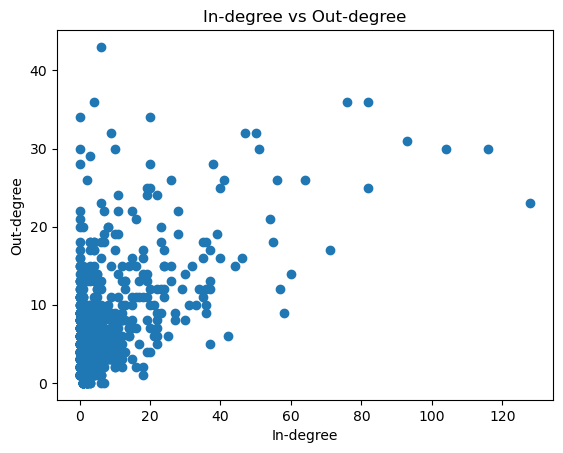

In [ ]:
# Plot scatter plot for in- versus out- degree
plt.Figure(figsize=(10,10))
plt.scatter(in_degree_values, out_degree_values)
plt.xlabel('In-degree')
plt.ylabel('Out-degree')
plt.title('In-degree vs Out-degree')
plt.show()


We can observe from the scattered plot that there is a larger frequency of out-degrees being somewhat the same around 0-20 whereas for the out-degree there is more outliers / Hubs 

>4. Plot a heatmap [(Hint here)](https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set) of the the in- versus out- degree for all rappers. What is the advantage of using a heatmap over the scatter plot?


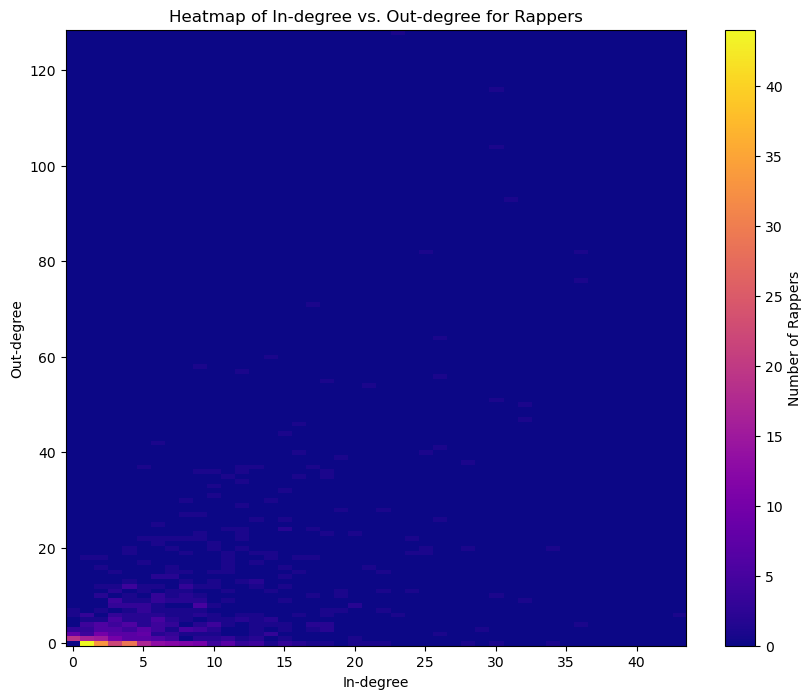

In [ ]:
import numpy as np

# Plot heatmap using scatterplot
hist, xedges, yedges = np.histogram2d(in_degree_values, out_degree_values, bins=[max(in_degree_values)+1, max(out_degree_values)+1]) #+1 ensures max value is included

# Plot the 2D histogram as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(hist, interpolation='nearest', origin='lower', cmap='plasma', aspect='auto')
plt.colorbar(label='Number of Rappers')
plt.xlabel('In-degree')
plt.ylabel('Out-degree')
plt.title('Heatmap of In-degree vs. Out-degree for Rappers')
plt.show()


Much more clear how we can represent density or concentration of data points in a par. region. Especially if we are getting larger datasets a scattered plot will propably look like one big cloud of points indistinct from each other

>5. Why have we used directed graphs throughout this exercise? Could we have used an undirected graph instead?


We would not have been able to show the relationship between in and out-degree at all with undirected graphs. Furthermore it is quite interesting to analyze the mix of the two and how they cluster together or perhaps what is the tendency of that.

>6. We have one more metric that we did not use. The node-attribute `content lenght`. There are two things we can investigate here.
>   * Firstly, we can verify that more text means more links. If that's true the length should correlate with out-degree.


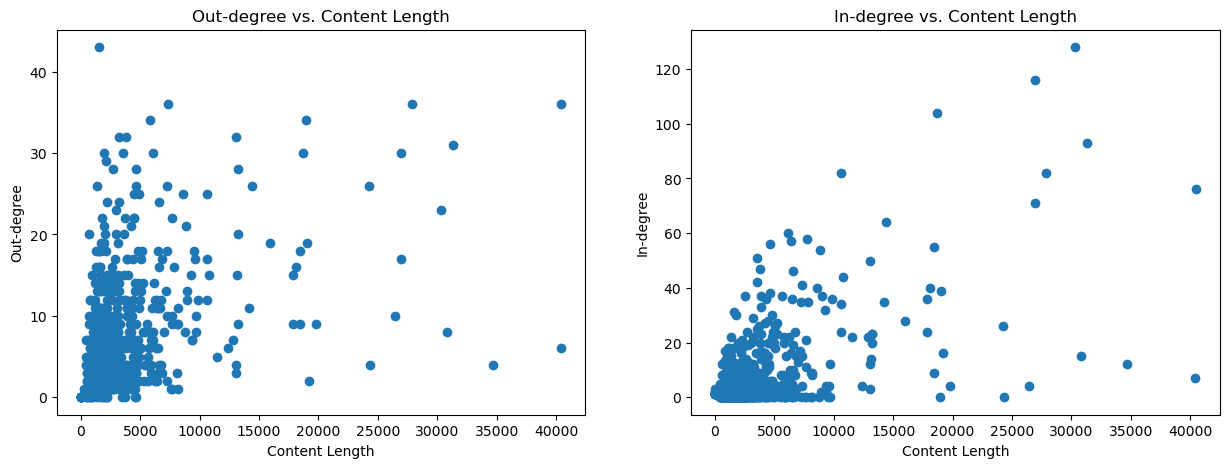

In [ ]:
# Analyze more content length means more links/edges

# Plot nodes by content length and out-degree and content length and in-degree on other axis side by side
axis1 = [G.nodes[node]['content_length'] for node in G.nodes()]
axis2 = [G.out_degree(node) for node in G.nodes()]
axis3 = [G.in_degree(node) for node in G.nodes()]

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(axis1, axis2)
plt.xlabel('Content Length')
plt.ylabel('Out-degree')
plt.title('Out-degree vs. Content Length')
plt.subplot(1, 2, 2)
plt.scatter(axis1, axis3)
plt.xlabel('Content Length')
plt.ylabel('In-degree')
plt.title('In-degree vs. Content Length')
plt.show()



 plot suggests a positive correlation between "content length" and "out-degree". However, there's variability in the data, indicating the relationship isn't strictly linear. Some regions show dense clustering, hinting at other underlying factors or patterns.

>   * Secondly, and more interestingly, it could be that famous rappers have longer texts. And that means more in-links. 
>   * How should you test this? Well, here you are allowed to be **creative**. You may choose the method of your liking to study this question (e.g. look at it visually, test the correlation using spearman or pearson, fit a curve to the data, you decide). Once you've tested, let me know. Are both questions true? If yes, which phenomenon is stronger? Explain your results in your own words.

Let us proxy fame by using in-degree and out-degree metrix. 

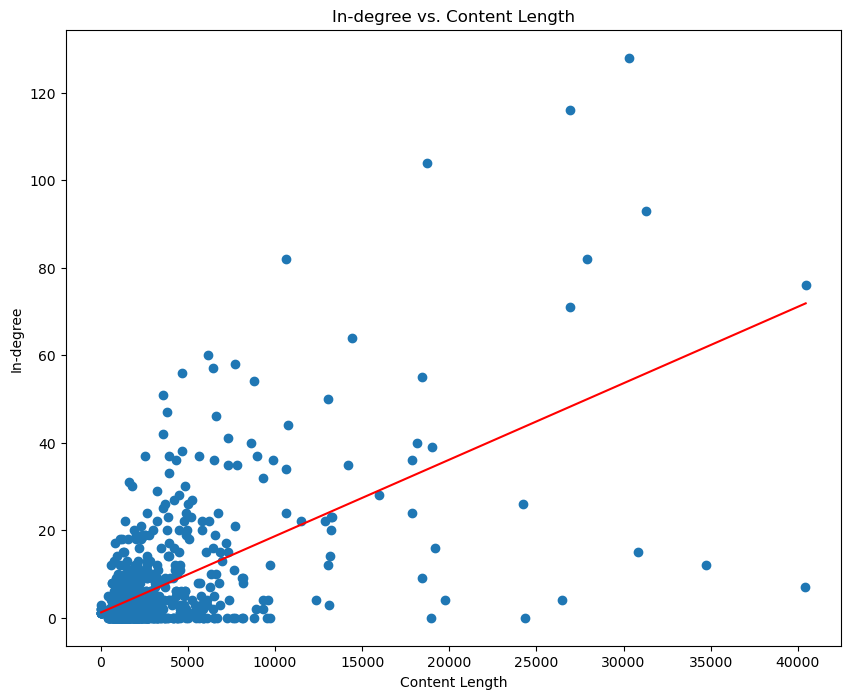

In [ ]:
# Linear fit for content length and in-degree
coefficients = np.polyfit(axis1, axis3, 1)
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(min(axis1), max(axis1), 100)
y_axis = polynomial(x_axis)

# Plot the linear fit
plt.figure(figsize=(10, 8))
plt.scatter(axis1, axis3)
plt.plot(x_axis, y_axis, color='red')
plt.xlabel('Content Length')
plt.ylabel('In-degree')
plt.title('In-degree vs. Content Length')
plt.show()



In [ ]:
pearson_corr_in_degree = nx.degree_pearson_correlation_coefficient(G)
spearman_corr_in_degree = nx.degree_assortativity_coefficient(G)
print("Pearson correlation coefficient for in-degree:", pearson_corr_in_degree)
print("Spearman correlation coefficient for in-degree:", spearman_corr_in_degree)

pearson_corr_out_degree = nx.degree_pearson_correlation_coefficient(G, weight='weight')
spearman_corr_out_degree = nx.degree_assortativity_coefficient(G, weight='weight')
print("Pearson correlation coefficient for out-degree:", pearson_corr_out_degree)
print("Spearman correlation coefficient for out-degree:", spearman_corr_out_degree)



Pearson correlation coefficient for in-degree: 0.024713880108487383
Spearman correlation coefficient for in-degree: 0.02471388010848742
Pearson correlation coefficient for out-degree: 0.024713880108487383
Spearman correlation coefficient for out-degree: 0.02471388010848742


Due to pearson and spearman being close to 0 it suggests there is a weak correlation between content length and both in-degree and out-degree. Meaning we cannot proxy fame based on length of the content and amount of in-degree

*Exercise 2:* Centralities, assortativity and more.

Earlier, we found the most connected nodes (using degree centrality). Now let's dig in and try to understand more about the network using more advanced features. 

**Note**: Not all of the measures we'll be considering below are defined for directed graphs. Only use the undirected graph when explicitly stated in the exercise.
>1. Find the 5 most central rappers according to [degree centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html). 


In [ ]:
G_5Central=nx.degree_centrality(G)
G_5Central=sorted(G_5Central.items(), key=lambda x: x[1], reverse=True)[:5]

print('top 5 degree centrality', G_5Central)



top 5 degree centrality [('Snoop Dogg', 0.20885200553250347), ('Jay-Z', 0.20193637621023514), ('Nas', 0.18533886583679116), ('50 Cent', 0.1715076071922545), ('Dr. Dre', 0.1632088520055325)]


>2. Find the 5 most central rappers according to [betweenness centrality](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_betweenness_centrality.html?highlight=betweenness%20centrality). 
>   * Repeat Exercise A2 or A3 (depending on which visualization method you liked the most). However, this time use betweenness centrality to define the size of the node.
>   * What role do you imagine rappers with high betweenness centrality play on  Wikipedia? 


top 5 betweenness centrality [('Snoop Dogg', 0.04976233781489431), ('Jay-Z', 0.04504745271516137), ('Kendrick Lamar', 0.044421448467601016), ('E-40', 0.04071278424050593), ('Nas', 0.040383446053484914)]


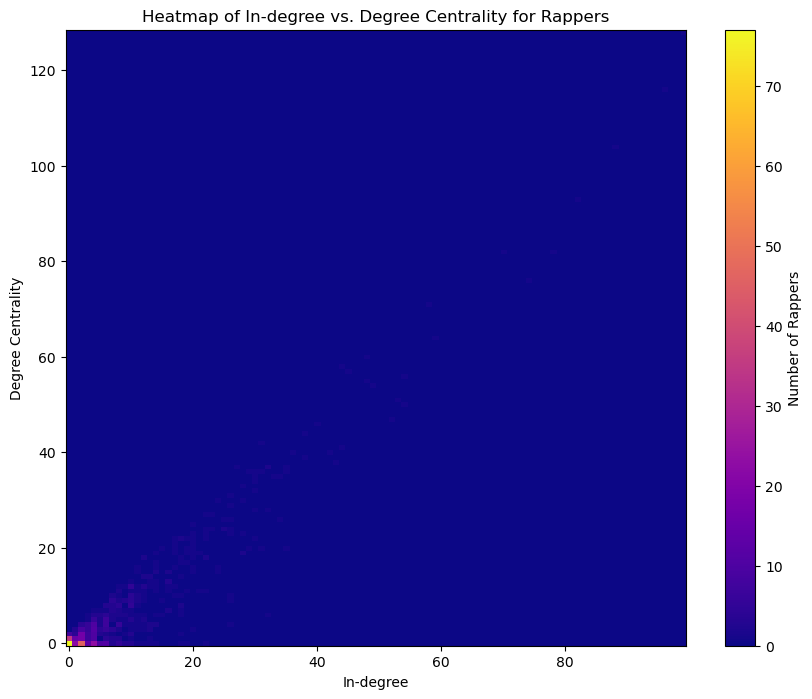

In [ ]:
G_5Between=nx.betweenness_centrality(G)
G_5Between=sorted(G_5Between.items(), key=lambda x: x[1], reverse=True)[:5]

print('top 5 betweenness centrality', G_5Between)

# heatmap of degree centrality
degree_centrality_values = [val for key, val in nx.degree_centrality(G).items()]
hist, xedges, yedges = np.histogram2d(in_degree_values, degree_centrality_values, bins=[max(in_degree_values)+1, 100]) #+1 ensures max value is included

# Plot the 2D histogram as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(hist, interpolation='nearest', origin='lower', cmap='plasma', aspect='auto')
plt.colorbar(label='Number of Rappers')
plt.xlabel('In-degree')
plt.ylabel('Degree Centrality')
plt.title('Heatmap of In-degree vs. Degree Centrality for Rappers')
plt.show()


 rappers with high betweenness centrality on Wikipedia could serve as significant connectors or bridges, not just within the rap community but potentially across different musical genres and cultural themes.

>3. Find the 5 most central rappers according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see [NetworkX documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality) for details). 
>   * Repeat Exercise A2 or A3 (depending on which visualization method you liked the most). However, this time use eigenvector centrality to define the size of the node.
>   * What role do you imagine rappers with high wikipedia graph eigenvector centrality play? 


Rappers with high eigenvector centrality in the Wikipedia graph are likely influential figures who are not just connected but also connected to other well-connected nodes. In simpler terms, they are not just popular but are also connected to other popular entities. These rappers likely have significant impact and reach, serving as major influencers within the rap community and possibly beyond.

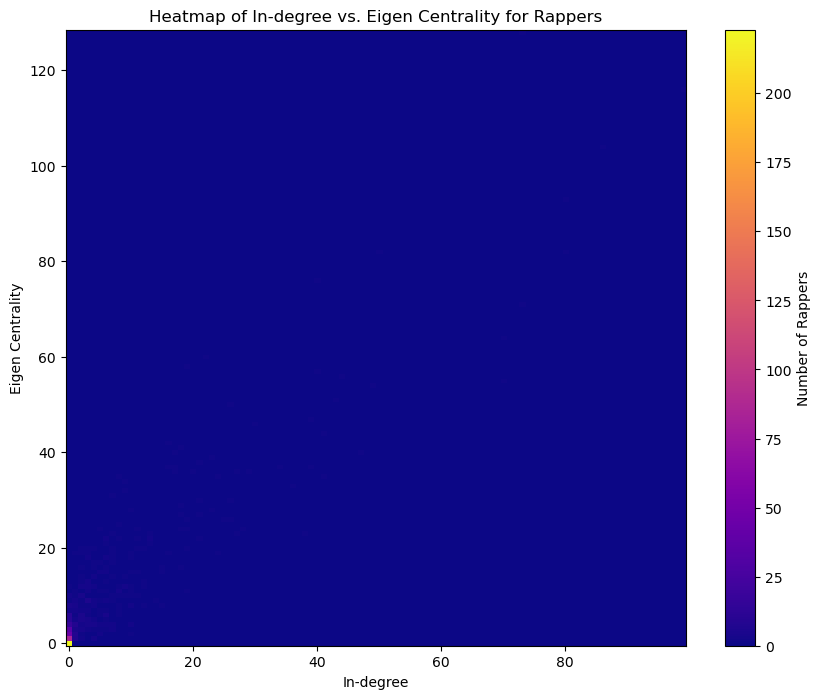

In [ ]:
#Eigen vector centrality
G_5Eigen=nx.eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight=None)
G_5Eigen=sorted(G_5Eigen.items(), key=lambda x: x[1], reverse=True)[:5]

# Centrality corresponding to in- and out-degree
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)

#Heatmap eigen vector centrality
eigen_centrality_values = [val for key, val in nx.eigenvector_centrality(G).items()]
hist, xedges, yedges = np.histogram2d(in_degree_values, eigen_centrality_values, bins=[max(in_degree_values)+1, 100]) #+1 ensures max value is included

# plot 2D Histogram as heatmap
plt.figure(figsize=(10, 8))
plt.imshow(hist, interpolation='nearest', origin='lower', cmap='plasma', aspect='auto')
plt.colorbar(label='Number of Rappers')
plt.xlabel('In-degree')
plt.ylabel('Eigen Centrality')
plt.title('Heatmap of In-degree vs. Eigen Centrality for Rappers')
plt.show()



>4. Is the undirected version of the graph assortative with respect to degree? (e.g. do high-degree rappers tend to link to other high-degree rappers, and low-degree rappers to other low-degree rappers?). Provide an interpretation of your answer.


In [ ]:
r = nx.degree_assortativity_coefficient(G_undirected)
r

-0.05979084237727871

Negative Value: Indicates that high-degree nodes tend to connect with low-degree nodes (disassortative).


>5. Is the undirected version of the graph assortative with respect do the `content length` nodal properties? (e.g. do rappers with long Wikipedia pages tend to link to other rappers with long Wiki pages, and *vice versa*?. Hint: Use [this function](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html#networkx.algorithms.assortativity.attribute_assortativity_coefficient). Provide an interpretation of your answer.


In [ ]:
t = nx.attribute_assortativity_coefficient(G_undirected, 'content')
t

0.002975939295132844

Slightly positive. It suggests that in the rap community, rappers w. long wiki are more likely to be connected to other rappers w. long wiki.

>6. Is the undirected version of the graph assortative with respect to Coast? (e.g. west-coast rappers tending to link to west-coast rappers, etc.). Provide an interpretation of your answer.


In [ ]:
y = nx.attribute_assortativity_coefficient(G_undirected, 'coast')
y

0.106870141164859

Also slightly positive meaning there is a tendency for e.g. west-coast rappers to link to other west-coast rappers and likewise with east-coast rappers.

>7. What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes $N$  and probablity of connection $p$?

In [ ]:
# ignore disconnected components
largest_cc = max(nx.connected_components(G_undirected), key=len)
largest_subgraph = G_undirected.subgraph(largest_cc)
avg_path_length = nx.average_shortest_path_length(largest_subgraph)


# Compare w. random graph with same N and P
random_graph = nx.fast_gnp_random_graph(len(largest_subgraph.nodes()), nx.density(largest_subgraph))
avg_path_length_random = nx.average_shortest_path_length(random_graph)

# print the results
print("Average path length of largest subgraph:", avg_path_length)
print("Average path length of random graph:", avg_path_length_random)




Average path length of largest subgraph: 3.0180805979349667
Average path length of random graph: 2.8450685775928495


This suggests that, on average, it takes slightly more "hops" to get from one node to another in the real-world network compared to a random network with similar properties.

>   * Take a look at the *distribution* of shortest paths for the two networks (create a histogram for each network) to better compare and contrast. Explain what you see in your own words.

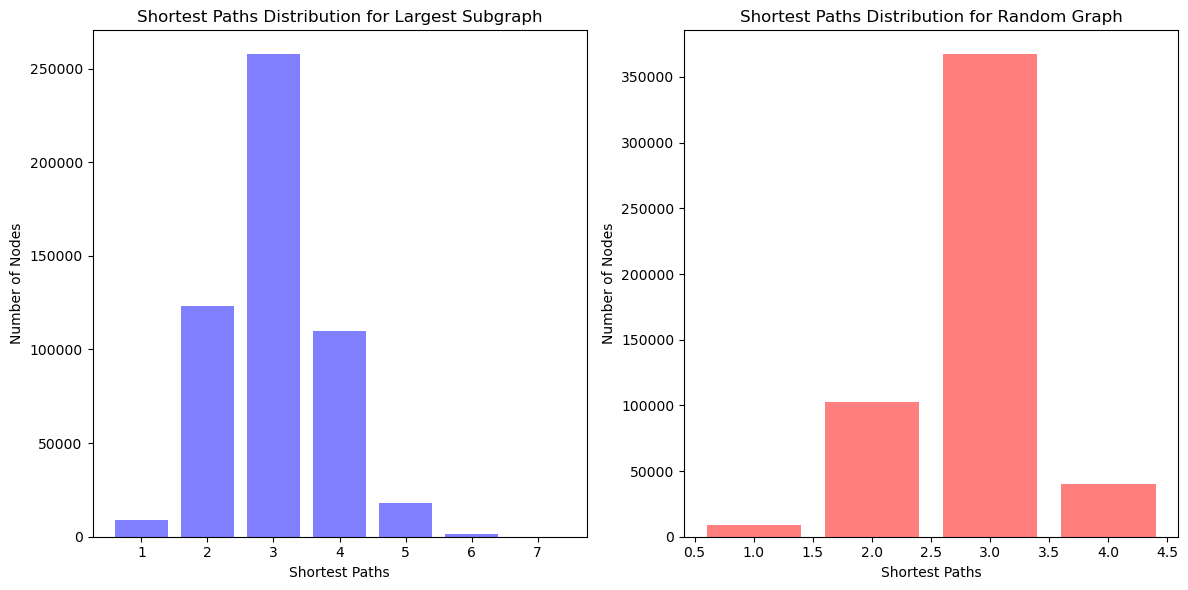

In [ ]:
# Calculate the distribution of shortest paths
shortest_paths_subgraph = [length for node, paths in nx.shortest_path_length(largest_subgraph) for length in paths.values()]
shortest_paths_random = [length for node, paths in nx.shortest_path_length(random_graph) for length in paths.values()]

# Create a single figure and axis object with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# For the largest subgraph
axs[0].hist(shortest_paths_subgraph, bins=range(1, max(shortest_paths_subgraph)+2), align='left', rwidth=0.8, alpha=0.5, color='blue')
axs[0].set_title('Shortest Paths Distribution for Largest Subgraph')
axs[0].set_xlabel('Shortest Paths')
axs[0].set_ylabel('Number of Nodes')

# For the random graph
axs[1].hist(shortest_paths_random, bins=range(1, max(shortest_paths_random)+2), align='left', rwidth=0.8, alpha=0.5, color='red')
axs[1].set_title('Shortest Paths Distribution for Random Graph')
axs[1].set_xlabel('Shortest Paths')
axs[1].set_ylabel('Number of Nodes')

# Show the plots
plt.tight_layout()
plt.show()


The range of shortest paths is broader in the largest subgraph, suggesting a more complex or diverse network structure.

The random graph seems to have a greater number of nodes for certain path lengths, which could indicate a more uniform distribution of connections.



*Exercise 3*: Is the coast of a rapper important for the network structure? Let us explore if and how it shapes the network (use the undirected network). 
>1. Compute the average node centrality for west-coast and east-coast rappers respectively. You are free to choose your favourite centrality measure or compare different ones. Which coast do the more central rappers have?


In [ ]:
# average node centrality for west coast rappers
west_coast_nodes = [node for node, data in G.nodes(data=True) if data['coast'] == 'West']
west_coast_centrality = nx.degree_centrality(G)
west_coast_centrality = [west_coast_centrality[node] for node in west_coast_nodes]
print("Average degree centrality for West Coast rappers:", sum(west_coast_centrality)/len(west_coast_centrality))

# average node centrality for east coast rappers
east_coast_nodes = [node for node, data in G.nodes(data=True) if data['coast'] == 'East']
east_coast_centrality = nx.degree_centrality(G)
east_coast_centrality = [east_coast_centrality[node] for node in east_coast_nodes]
print("Average degree centrality for East Coast rappers:", sum(east_coast_centrality)/len(east_coast_centrality))



Average degree centrality for West Coast rappers: 0.02500265985743159
Average degree centrality for East Coast rappers: 0.011194674965421831


West coast has the more central rappers

>2. Create a randomized version of the full graph, where the association between nodes and coast is shuffled. Compute the average centrality of west-coast and east-coast rappers for this randomized graph. 
>   * **Hint**: To create this shuffling, simply give everyone a random coast assignment (but with the same number of west-coast and east-coast rappers as in the real data). The way I usually create random lables is by using either [`random.shuffle`](https://docs.python.org/3/library/random.html#random.shuffle) or [`numpy.random.permutation`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.permutation.html).


Number of West Coast rappers: 468
Number of East Coast rappers: 256
Average centrality of West Coast rappers in randomized graph: 0.020743932569658712
Average centrality of East Coast rappers in randomized graph: 0.018980160788381745


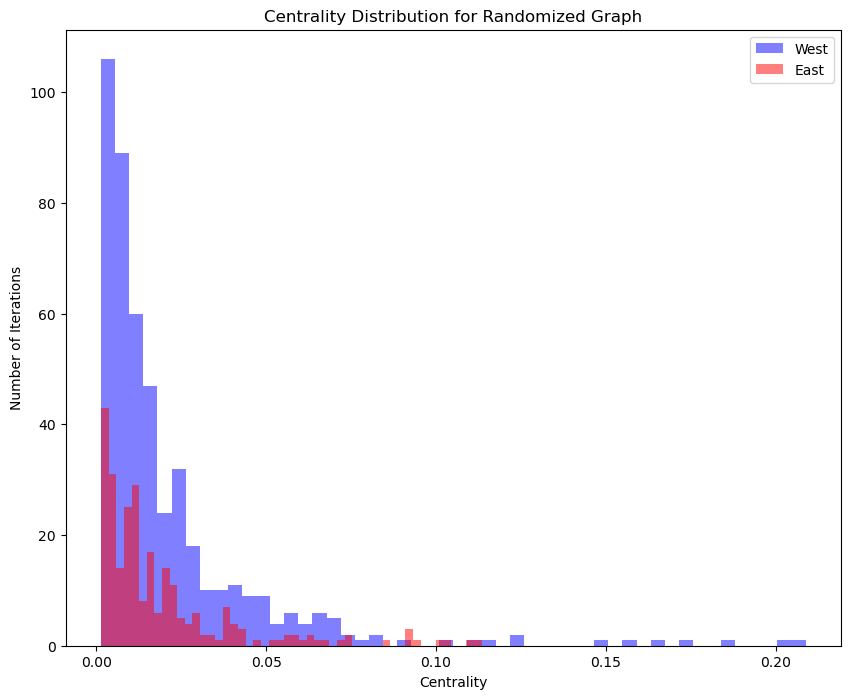

In [ ]:
west_coast_rappers = [node for node, data in G.nodes(data=True) if data['coast'] == 'West']
print("Number of West Coast rappers:", len(west_coast_rappers))

east_coast_rappers = [node for node, data in G.nodes(data=True) if data['coast'] == 'East']
print("Number of East Coast rappers:", len(east_coast_rappers))


# Copy of graph
G_random = G.copy()

# List of coast labels
total_labels = ['West'] * len(west_coast_rappers) + ['East'] * len(east_coast_rappers)

# Shuffle the labels
np.random.shuffle(total_labels)

# Assign the shuffled labels to the nodes
for i, (node, data) in enumerate(G_random.nodes(data=True)):
    data['coast'] = total_labels[i]

# Centrality
centrality = nx.degree_centrality(G_random)

west_centrality = [centrality[node] for node, data in G_random.nodes(data=True) if data['coast'] == 'West']
east_centrality = [centrality[node] for node, data in G_random.nodes(data=True) if data['coast'] == 'East']

avg_west_centrality = np.mean(west_centrality)
avg_east_centrality = np.mean(east_centrality)

print("Average centrality of West Coast rappers in randomized graph:", avg_west_centrality)
print("Average centrality of East Coast rappers in randomized graph:", avg_east_centrality)

# Plot the histograms
plt.figure(figsize=(10, 8))
plt.hist(west_centrality, bins=50, alpha=0.5, color='blue', label='West')
plt.hist(east_centrality, bins=50, alpha=0.5, color='red', label='East')
plt.legend()
plt.xlabel('Centrality')
plt.ylabel('Number of Iterations')
plt.title('Centrality Distribution for Randomized Graph')
plt.show()


From the graph we can see many nodes have low centrality near 0.00. In our case a large number of nodes have limited influence compared to other nodes. Fun fact it is also often seen in 'scale free' networks where a few (towards 0.2) act as hubs with many connections

>3. Repeat the shuffling process above 1000 times (at least) and plot two histograms, each histogram with the 1000 corresponding average values of centrality obtained for west-coast and east-coast rappers in the shuffeled netowrks.


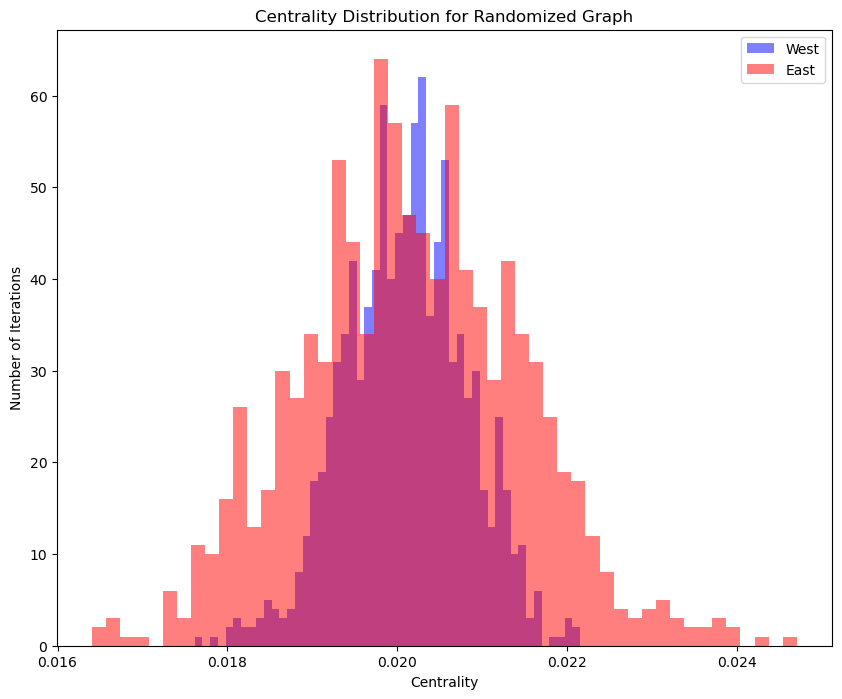

In [ ]:
# Repeat shuffling process 1000 times
west_centrality = []
east_centrality = []
for i in range(1000):
    # Copy of graph
    G_random = G.copy()

    # List of coast labels
    total_labels = ['West'] * len(west_coast_rappers) + ['East'] * len(east_coast_rappers)

    # Shuffle the labels
    np.random.shuffle(total_labels)

    # Assign the shuffled labels to the nodes
    for i, (node, data) in enumerate(G_random.nodes(data=True)):
        data['coast'] = total_labels[i]

    # Centrality
    centrality = nx.degree_centrality(G_random)

    west_centrality.append(np.mean([centrality[node] for node, data in G_random.nodes(data=True) if data['coast'] == 'West']))
    east_centrality.append(np.mean([centrality[node] for node, data in G_random.nodes(data=True) if data['coast'] == 'East']))

# Plot the histograms
plt.figure(figsize=(10, 8))
plt.hist(west_centrality, bins=50, alpha=0.5, color='blue', label='West')
plt.hist(east_centrality, bins=50, alpha=0.5, color='red', label='East')
plt.legend()
plt.xlabel('Centrality')
plt.ylabel('Number of Iterations')
plt.title('Centrality Distribution for Randomized Graph')
plt.show()


>4. Compare the value you have obtained in the real graph, with the randomized cases. Are rappers from one coast more central in the network (on average)?


When centrality values are grouped around a middle value like 0.02, it suggests a different kind of network structure compared to a network where most nodes have low centrality close to 0.00. A large majority of them are with many edges/connections and influence is more uniformly distributed than the other. It is much closer to a small network and not dependent on a few connectors or hubs.



>5. Think about your results, what could be possible explanations for what you observe?

The shuffling procedure you just carried out is often called a _permutation test_. It is a super powerful tool that we use all the time. Once you start to think about it, you can answer many questions of the type "Is [property] higher/lower in this network than one might have expected by chance?" with permutation tests.